# Ford GoBike Data Visualization and Analysis
## by Manuel Quijada

## Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 
Bay Area Bike Share is a company that provides on-demand bike rentals for customers in San Francisco, Redwood City, Palo Alto, Mountain View, and San Jose. Users can unlock bikes from a variety of stations throughout each city, and return them to any station within the same city. Users pay for the service either through a yearly subscription or by purchasing 3-day or 24-hour passes. Users can make an unlimited number of trips, with trips under thirty minutes in length having no additional charge; longer trips will incur overtime fees.

The source data (Ford GoBike System Data) is available at : https://www.fordgobike.com/system-data.

In [102]:
# import all packages and set plots to be embedded inline
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import math
import calendar
import cufflinks as cf

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image

from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap, figure

%matplotlib inline

In [103]:
# read data
folder_name_of_csvs = 'trip_data_files'

In [104]:
# combine all locally saved csv into one dataframe 
list_csvs = []
for file_name in listdir(folder_name_of_csvs):
    list_csvs.append(pd.read_csv(folder_name_of_csvs+'/'+file_name))
df = pd.concat(list_csvs)

In [105]:
df.to_csv('data.csv')

In [106]:
# examine dataframe
df = pd.read_csv('data.csv')

In [107]:
df.head()

,Unnamed: 0,Unnamed: 0.1,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,0,0.0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,NaN
1,1,1.0,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,NaN
2,2,2.0,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,NaN
3,3,3.0,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,NaN
4,4,4.0,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,NaN


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252058 entries, 0 to 2252057
Data columns (total 18 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   Unnamed: 0.1             float64
 2   duration_sec             int64  
 3   start_time               object 
 4   end_time                 object 
 5   start_station_id         float64
 6   start_station_name       object 
 7   start_station_latitude   float64
 8   start_station_longitude  float64
 9   end_station_id           float64
 10  end_station_name         object 
 11  end_station_latitude     float64
 12  end_station_longitude    float64
 13  bike_id                  int64  
 14  user_type                object 
 15  member_birth_year        float64
 16  member_gender            object 
 17  bike_share_for_all_trip  object 
dtypes: float64(8), int64(3), object(7)
memory usage: 309.3+ MB


In [109]:
len(df)

2252058

In [110]:
# set visualization style
sns.set_style('whitegrid')
sns.set_context("talk")

In [111]:
# filter data to include reasonable member age range
df['member_age'] = 2020-df['member_birth_year']

In [112]:
# check outliers
df['member_age'].describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .75, .8, .9, .95])

count    2.079810e+06
mean     3.753289e+01
std      1.051074e+01
min      2.000000e+01
10%      2.600000e+01
20%      2.900000e+01
30%      3.100000e+01
40%      3.300000e+01
50%      3.500000e+01
60%      3.800000e+01
70%      4.100000e+01
75%      4.300000e+01
80%      4.600000e+01
90%      5.300000e+01
95%      5.800000e+01
max      1.390000e+02
Name: member_age, dtype: float64

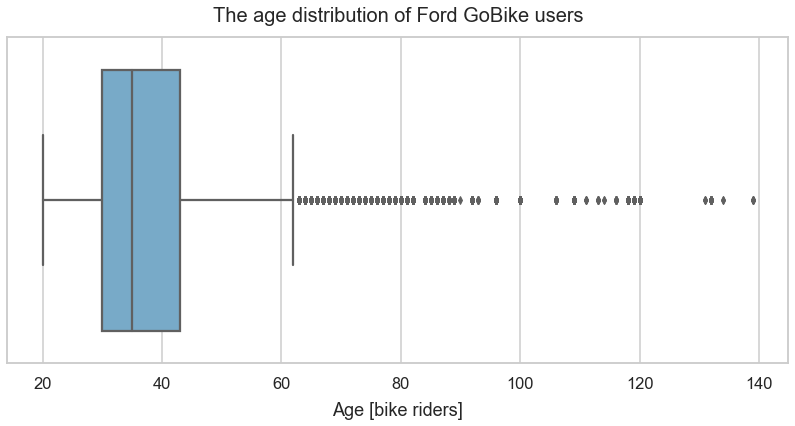

In [113]:
plt.figure(figsize=(14,6))
sns.boxplot(x='member_age', data=df, palette='Blues', orient='h')
plt.title("The age distribution of Ford GoBike users", fontsize=20, y=1.03)
plt.xlabel("Age [bike riders]", fontsize=18, labelpad=10)
plt.savefig('image01.png');

95% of the distrubition of users age range from 18 to 56. Accordingly we remove users more than 60 years old.

In [114]:
df = df[df['member_age']<=60]

In [115]:
df['member_age'].mean()

36.516541583017805

In [116]:
df.drop(['Unnamed: 0', 'member_birth_year'], axis=1, inplace=True)

The goFord bike users' median user age is around 37.

In [117]:
# filter data only to include San Francisco rides
max_longitude_sf = -122.3597
min_longitude_sf = -122.5147
max_latitude_sf = 37.8121
min_latitude_sf = 37.7092

In [118]:
end_station_latitude_mask = (df['end_station_latitude']>=min_latitude_sf) & (df['end_station_latitude']<=max_latitude_sf)
start_station_latitude_mask = (df['start_station_latitude']>=min_latitude_sf) & (df['start_station_latitude']<=max_latitude_sf)

In [119]:
end_station_longitude_mask =(df['end_station_longitude']>=min_longitude_sf) & (df['end_station_longitude']<=max_longitude_sf)
start_station_longitude_mask = (df['start_station_longitude']>=min_longitude_sf) & (df['start_station_longitude']<=max_longitude_sf)

In [120]:
df = df[end_station_latitude_mask & start_station_latitude_mask & end_station_longitude_mask & start_station_longitude_mask]

In [121]:
len(df)

1488824

In [122]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(1488824, 17)
Unnamed: 0.1               float64
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_gender               object
bike_share_for_all_trip     object
member_age                 float64
dtype: object
    Unnamed: 0.1  duration_sec                start_time  \
0            0.0         80110  2017-12-31 16:57:39.6540   
1            1.0         78800  2017-12-31 15:56:34.8420   
12          12.0          2183  2017-12-31 23:52:55.5810   
13          13.0          2170  2017-12-31 23:52:55.9370   
15          15.0          1544  2017-12-31 23:53:38.9430   
16          16.0 

### What is the structure of your dataset?

> The dataset demonstrates 1505886 rides in the dataset with 16 features, for instance, bike_id, user_type, member_age, start_station_name. Most variables are numeric in the dataset.

### What is/are the main feature(s) of interest in your dataset?

> Average ridind duration, riding distance, leisure or discipline riding, age groups of users, weekly day distribution.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Age group may help support the investigation as well as customer behaviors.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [123]:
# generate new fields for date from start_time and end_time
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

In [124]:
df['start_time_date']=df['start_time'].dt.date
df['end_time_date']=df['end_time'].dt.date

In [125]:
df['start_time_year_month']=df['start_time'].map(lambda x: x.strftime('%Y-%m'))
df['end_time_year_month']=df['end_time'].map(lambda x: x.strftime('%Y-%m'))

In [126]:
df['start_time_year_month_renamed'] = df['start_time'].dt.strftime('%y' + '-' + '%m')

In [127]:
df['start_time_year']=df['start_time'].dt.year.astype(int)
df['end_time_year']=df['end_time'].dt.year.astype(int)

In [128]:
df['start_time_month']=df['start_time'].dt.month.astype(int)
df['end_time_month']=df['end_time'].dt.month.astype(int)

In [129]:
df['start_time_hour_minute']=df['start_time'].map(lambda x: x.strftime('%H-%m'))
df['end_time_hour_minute']=df['end_time'].map(lambda x: x.strftime('%H-%m'))

In [130]:
df['start_time_hour']=df['start_time'].dt.hour
df['end_time_hour']=df['end_time'].dt.hour

In [131]:
df['start_time_weekday_abbr']=df['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
df['end_time_weekday_abbr']=df['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

In [132]:
# generate a new field for member age group from member_age_bin
df['member_age_bins'] = df['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

In [133]:
# generate minutes for trip duration from duration_sec
df['duration_min'] = df['duration_sec']/60

In [134]:
# generate new fields for distance
def distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

### Average count of rides per bike per day

In [135]:
df['distance_km_estimates'] = df.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)
df['distance_miles_estimates'] = df['distance_km_estimates']*0.621371

In [136]:
count_of_rides = df.groupby('start_time_year_month_renamed')['bike_id'].size().reset_index()

In [137]:
count_of_unique_rides = df.groupby('start_time_year_month_renamed')['bike_id'].nunique().reset_index().rename(columns={'bike_id':'unique_bike_id'})

In [138]:
count_of_rides_df = count_of_rides.merge(count_of_unique_rides, on='start_time_year_month_renamed')

In [139]:
count_of_rides_df['number_of_used'] = count_of_rides_df['bike_id']/count_of_rides_df['unique_bike_id']

In [140]:
July2017_avg_num_bike_used_per_day = (count_of_rides_df[count_of_rides_df['start_time_year_month_renamed']=='17-07']['number_of_used'].mean())/31

In [141]:
July2018_avg_num_bike_used_per_day = (count_of_rides_df[count_of_rides_df['start_time_year_month_renamed']=='18-07']['number_of_used'].mean())/31

In [142]:
print(July2017_avg_num_bike_used_per_day, July2018_avg_num_bike_used_per_day)

0.8516012366563612 2.793134656409593


In [143]:
July2018_avg_num_bike_used_per_day/July2017_avg_num_bike_used_per_day

3.27986214225835

Compared to 2017 July, where average count of rides per bike per day was (0.8516), it increased 3.27 times in 2018 July, where average count of rides per bike per day reaches almost 3 times (2.793).

In [144]:
def transform_axis_fmt(tick_val, pos):
    if tick_val >= 1000:
        val = int(tick_val/1000)
        return '{:d}K'.format(val)
    elif tick_val >= 1000000: 
        val = int(tick_val/1000000)
        return '{:d}M'.format(val)
    else:
        return int(tick_val)

### Count of daily bike rides from June 2017 to July 2018

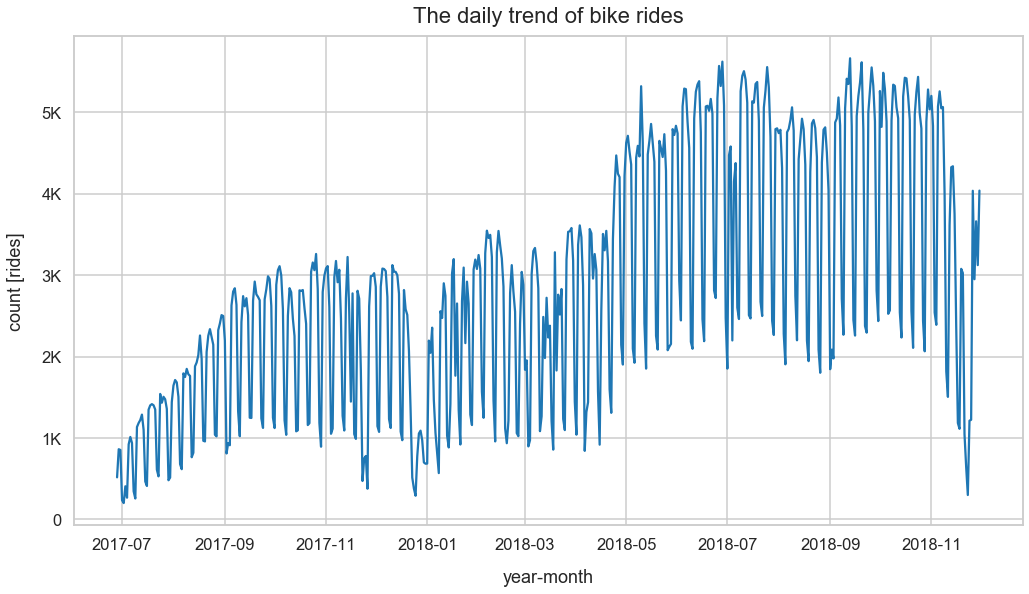

In [145]:
df.groupby('start_time_date').agg({'bike_id':'count'}).plot(style='-', legend=False, figsize=(17,9))
plt.title('The daily trend of bike rides', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('image02.png');

Compared to begining of July 2017, where daily rides were less than 1K, ithe data illustrates an increase of more than 5000 after less than year (June 2018) With a significant decrease around January 2018 and November 2018 when the winter session time begins.

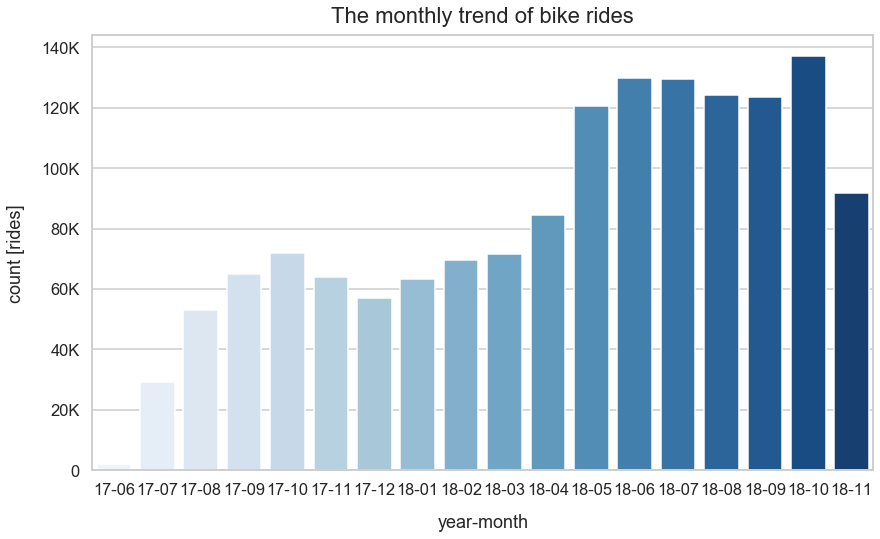

In [146]:
plt.figure(figsize=(14,8))
sns.countplot(x='start_time_year_month_renamed', palette="Blues", data=df.sort_values(by='start_time_year_month_renamed'))
plt.title('The monthly trend of bike rides', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('image03.png');

The data illustrates a seasonality during the winter session. Nontheless, compared to July 2017, bike rides of July 2018 increased more than 5 times.

### Count of people who took bike rides by age group per month. 

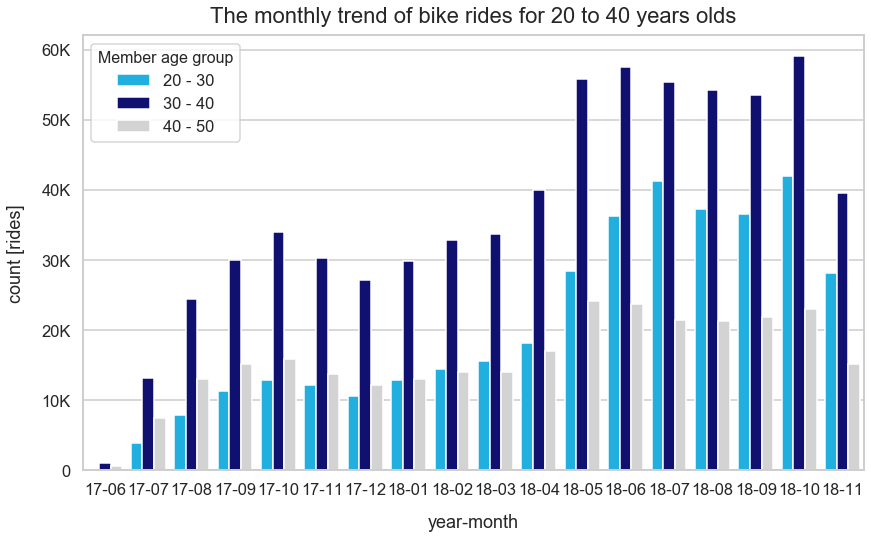

In [147]:
plt.figure(figsize=(14,8))
my_palette = {'20 - 30': 'deepskyblue', '30 - 40': 'navy', '40 - 50': 'lightgrey'}
ax = sns.countplot(x='start_time_year_month_renamed', hue='member_age_bins', palette=my_palette, data=df[df['member_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50'])].sort_values(by=['start_time_year_month_renamed', 'member_age_bins']))
plt.title('The monthly trend of bike rides for 20 to 40 years olds', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('image04.png');

20-30 years old users are rapidly growing compared to other user groups. When the service first started 30-40 years old users were dominant, however 20-30 years old users became leader in a year.

### Total rides from June 2017 to July 2018

In [148]:
df['bike_id'].sum()

3278244326

There were 3.27 billion rides

### Bike rides per member age group

In [149]:
trip_by_age_df = df.groupby('member_age_bins').agg({'bike_id':'count'})

In [150]:
trip_by_age_df['perc'] = (trip_by_age_df['bike_id']/trip_by_age_df['bike_id'].sum())*100

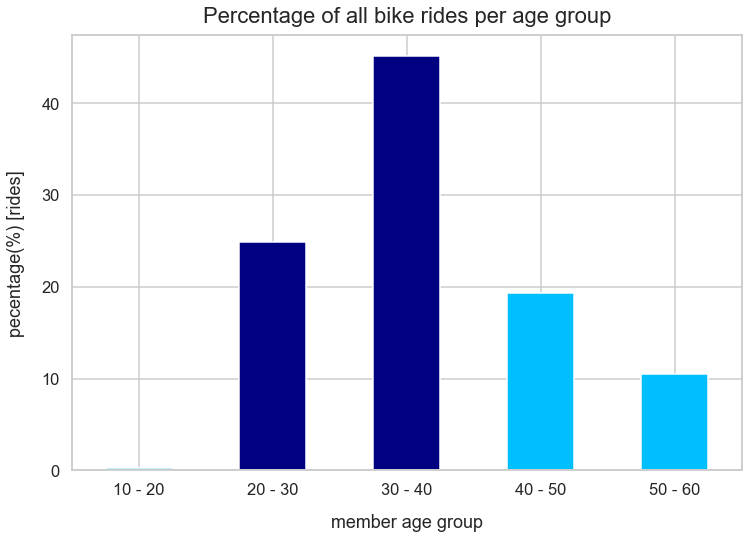

In [151]:
new_color = ['deepskyblue', 'navy', 'navy', 'deepskyblue', 'deepskyblue']
trip_by_age_df['perc'].plot(kind='bar', color=new_color, figsize=(12,8))
plt.title('Percentage of all bike rides per age group', fontsize=22, y=1.015)
plt.xlabel('member age group', labelpad=16)
plt.ylabel('pecentage(%) [rides]', labelpad=16)
plt.xticks(rotation=360)
plt.savefig('image05.png');

20 to 40 years old people took the more than 70% of bike rides. Among those, 30 to 40 years old people's rides account almost 40% of all bike rides.

### Bike rides per gender

In [152]:
trip_by_gender_df = df.groupby('member_gender').agg({'bike_id':'count'})

In [153]:
trip_by_gender_df['perc'] = (trip_by_gender_df['bike_id']/trip_by_gender_df['bike_id'].sum())*100

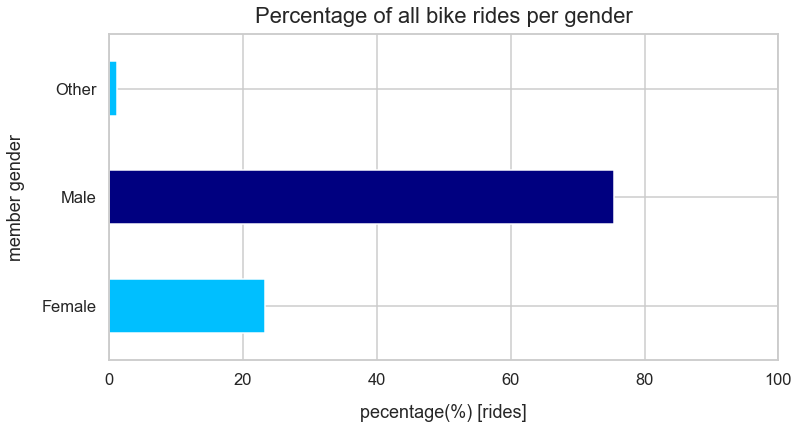

In [154]:
new_color = ['deepskyblue', 'navy', 'deepskyblue']
trip_by_gender_df['perc'].plot(kind='barh', color=new_color, figsize=(12,6))
plt.title('Percentage of all bike rides per gender', fontsize=22, y=1.015)
plt.ylabel('member gender', labelpad=16)
plt.xlabel('pecentage(%) [rides]', labelpad=16)
plt.xticks(rotation=360)
plt.xlim(0,100)
plt.savefig('image06.png');

Males demonstrate 76% of all bike rides, in turn females are viewes with taken 22% of them.

### Bike rides per weekday

In [155]:
trip_by_weekday_df = df.groupby('start_time_weekday_abbr').agg({'bike_id':'count'})

In [156]:
trip_by_weekday_df['perc'] = (trip_by_weekday_df['bike_id']/trip_by_weekday_df['bike_id'].sum())*100

In [157]:
weekday_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

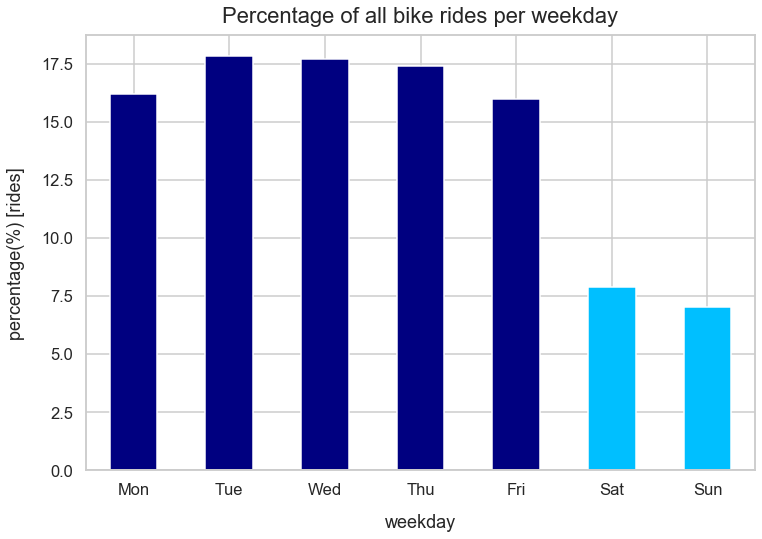

In [158]:
new_color = ['navy', 'navy', 'navy', 'navy', 'navy', 'deepskyblue', 'deepskyblue']
trip_by_weekday_df.reindex(weekday_index)['perc'].plot(kind='bar', color=new_color, figsize=(12,8), legend=False)
plt.title('Percentage of all bike rides per weekday', fontsize=22, y=1.015)
plt.xlabel('weekday', labelpad=16)
plt.ylabel('percentage(%) [rides]', labelpad=16)
plt.xticks(rotation=360)
plt.savefig('image07.png');

The data illustrates users use the service on weekdays moreso than on weekends.

### Peak hours of the day

In [159]:
trip_by_hour_df = df.groupby('start_time_hour').agg({'bike_id':'count'}).reset_index()

In [160]:
trip_by_hour_df['bike_id'] = (trip_by_hour_df['bike_id']/trip_by_hour_df['bike_id'].sum())*100

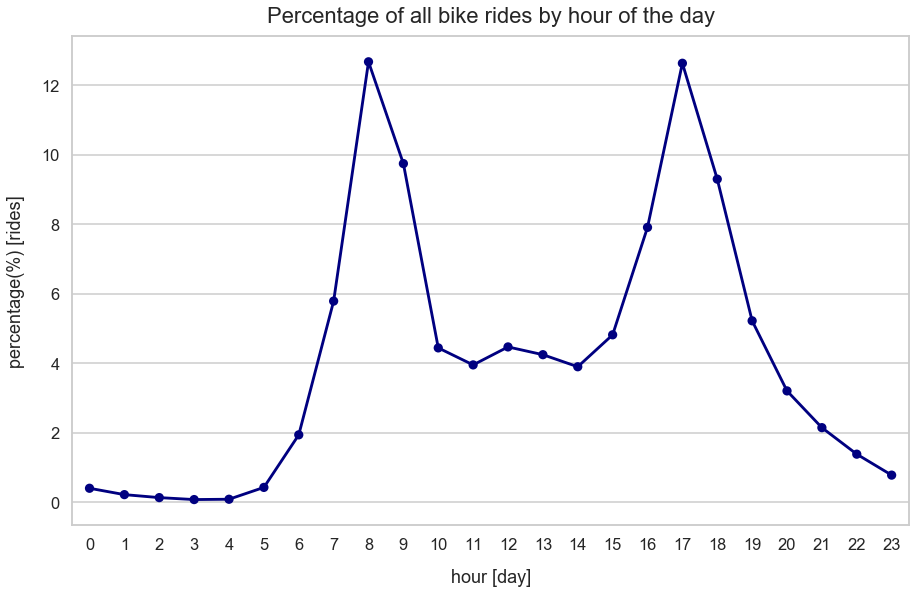

In [161]:
plt.figure(figsize=(15,9))
sns.pointplot(x='start_time_hour', y='bike_id', scale=.7, color='navy', data=trip_by_hour_df)
plt.title('Percentage of all bike rides by hour of the day', fontsize=22, y=1.015)
plt.xlabel('hour [day]', labelpad=16)
plt.ylabel('percentage(%) [rides]', labelpad=16)
plt.savefig('image08.png');

The graph shows 8am and 5pm as the peak hours for this service. Illustrating the majority of users utilize during the commuting hours, in addition, during lunch hours.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The variables, example, average rides, daily and monthly trend of riders, age groups, genders, peak hours, distances were distributions that helped identify and communicated data results. For instance, there were 3.27 billion rides 20 to 40 years old people took the more than 70% of bike rides. Among those, 30 to 40 years old people's rides account almost 40% of all bike rides. Males demonstrate 76% of all bike rides, in turn females are viewes with taken 22% of them. The data illustrates users use the service on weekdays moreso than on weekends. The graph shows 8am and 5pm as the peak hours for this service. Illustrating the majority of users utilize during the commuting hours, in addition, during lunch hours.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Accordingly we removed users more than 60 years old. 95% of the distrubition of users age range from 18 to 56. We generated new fields such as duration, time, age groups etc. in order to calculate them easily and understand the dataframe. In addition, decided to focus on San Fancisco area by limiting with latitude and longitude.

## Bivariate Exploration

### Percentage trend of bike rides per user type

In [162]:
count_of_rides_per_user_type = df.groupby('user_type').size().reset_index(name='count')

In [163]:
count_of_rides_per_user_type['count']/len(df)*100

0    11.912355
1    88.087645
Name: count, dtype: float64

Data indicates percentage of subscribers is 88.08%.
Data indicates percentage of customers is 11.91%.

In [164]:
user_type_count_per_year_df = df.groupby(["start_time_year_month_renamed", "user_type"]).size().reset_index()

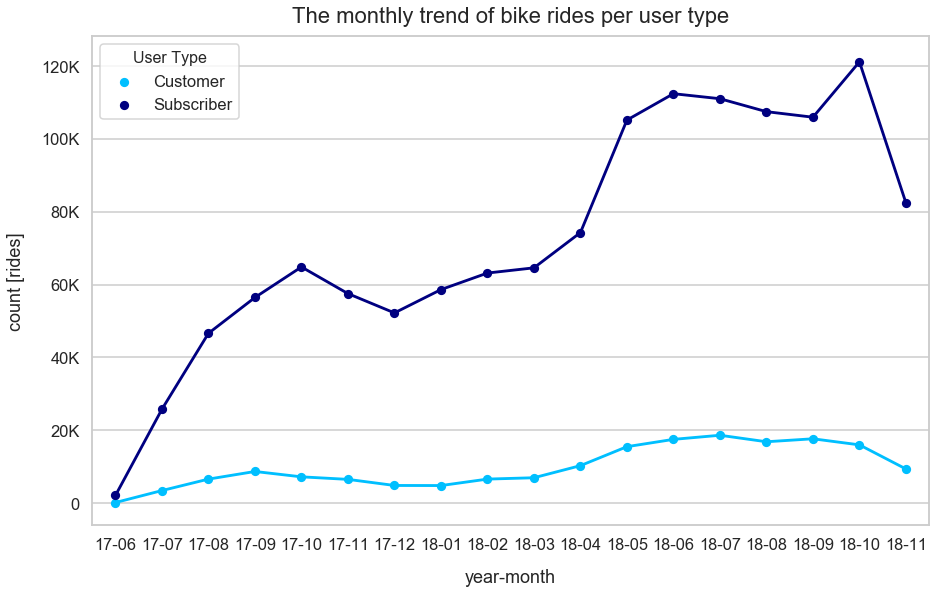

In [165]:
plt.figure(figsize=(15,9))
my_palette = {'Subscriber':'navy', 'Customer':'deepskyblue'}
ax = sns.pointplot(x='start_time_year_month_renamed', y=0, hue='user_type', palette=my_palette, scale=.7, data=user_type_count_per_year_df)
plt.title('The monthly trend of bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('image09.png');

The graph illustrates subscribers rides as most significant decreasing toward the winter session than customers.

Text(0.5, 0, 'minutes [trip duration]')

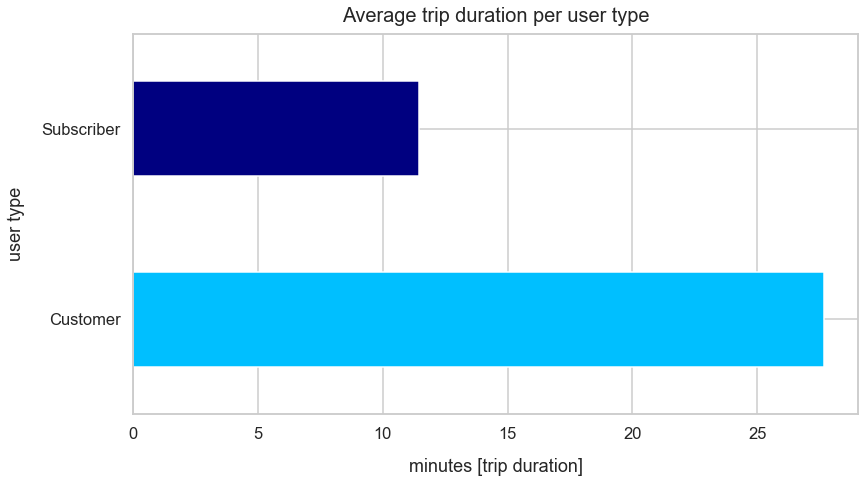

In [166]:
new_color=['deepskyblue', 'navy']
ax = df.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=new_color, figsize=(13,7))
ax.set_title('Average trip duration per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('minutes [trip duration]', labelpad=16)


Subscribers' average trip duration around 11 minutes. Conversely, customers' average trip duration of 28 minutes. 80% of the rides are from subscribers and it illustrating use of service during commute hours.

### Average trip distance per user type

Text(0.5, 0, 'miles [distance]')

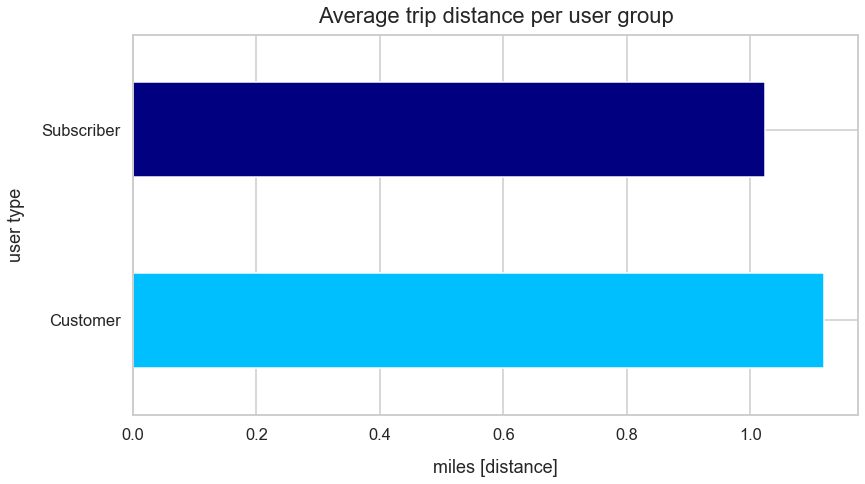

In [167]:
ax = df.groupby('user_type')['distance_miles_estimates'].mean().plot(kind='barh', color=new_color, figsize=(13,7))
ax.set_title('Average trip distance per user group', fontsize=22, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('miles [distance]', labelpad=16)

Subscribers and customers trip distance were comparable, which is moderately more than one mile.

### The trend of subscribers' bike rides per age group

In [168]:
subscriber_age_df = df[df['user_type']=='Subscriber'].groupby(['start_time_year_month_renamed', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()

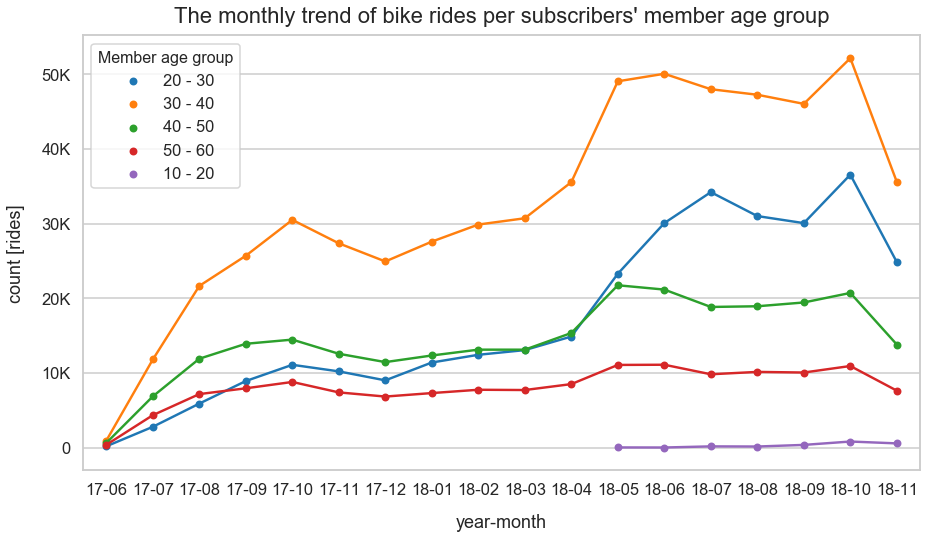

In [169]:
plt.figure(figsize=(15,8))
ax = sns.pointplot(x='start_time_year_month_renamed', y='bike_id', hue='member_age_bins', scale=.6, data=subscriber_age_df)
plt.title("The monthly trend of bike rides per subscribers' member age group", fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('image12.png');

### Main purpose bike rides for subscribers and customers (20~40 years age group)

In [170]:
subscriber_hour_df = df[(df['member_age']>=20) & (df['member_age']<40) 
                              &(df['start_time_hour']>5)&(df['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [171]:
subscriber_hour_df['start_time_weekday_abbr'] = pd.Categorical(subscriber_hour_df['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [172]:
subscriber_hour_df['count_perc'] = subscriber_hour_df['count'].apply(lambda x: (x/subscriber_hour_df['count'].sum())*100)

In [173]:
subscriber_hour_df['rank'] = subscriber_hour_df['count_perc'].rank(ascending=False).astype(int)

In [174]:
subscriber_hour_df_pivoted = subscriber_hour_df.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')

In [175]:
customer_hour_df = df[(df['member_age']>=20) & (df['member_age']<40) 
                              &(df['start_time_hour']>5)&(df['user_type']=='Customer') 
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [176]:
customer_hour_df['start_time_weekday_abbr'] = pd.Categorical(customer_hour_df['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [177]:
customer_hour_df['count_perc'] = customer_hour_df['count'].apply(lambda x: (x/customer_hour_df['count'].sum())*100) #male

In [178]:
customer_hour_df['rank'] = customer_hour_df['count_perc'].rank(ascending=False).astype(int)

In [179]:
customer_hour_df_pivoted = customer_hour_df.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank').astype(int)

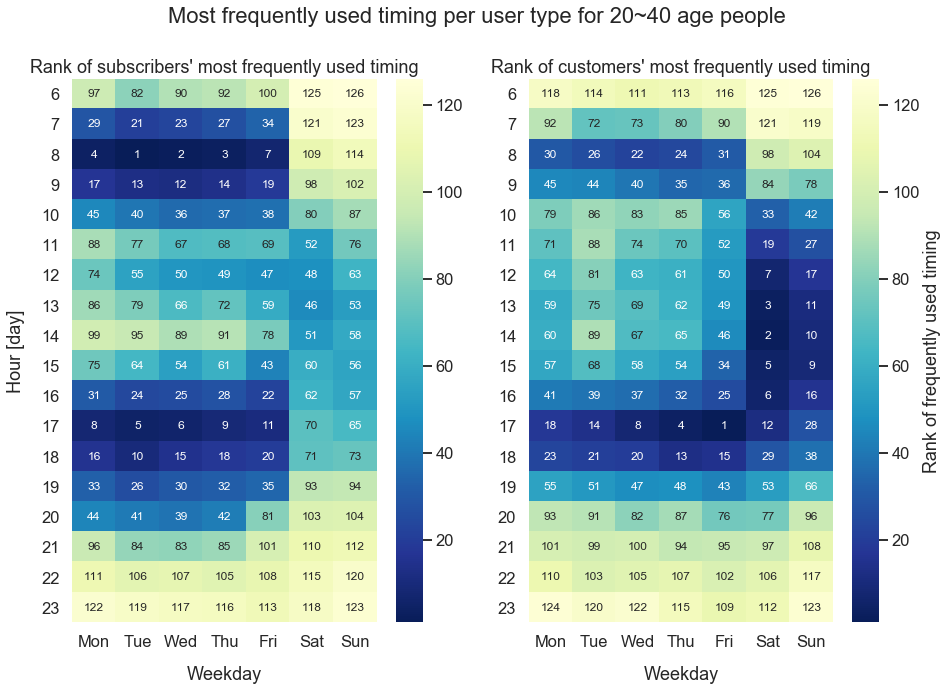

In [180]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.suptitle('Most frequently used timing per user type for 20~40 age people', fontsize=22)
sns.heatmap(subscriber_hour_df_pivoted, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 12})
plt.title("Rank of subscribers' most frequently used timing", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hour [day]', labelpad=16)
plt.yticks(rotation=360)
plt.subplot(122)
sns.heatmap(customer_hour_df_pivoted, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 12}, cbar_kws={'label': 'Rank of frequently used timing'})
plt.title("Rank of customers' most frequently used timing", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)
plt.savefig('image13.png');

Subscribers' most frequently used timing is around 7 ~ 9am and 4 ~ 6pm, which is a commute time. In the contrary, Customers' most frequently used timing are weekend 12pm ~ 4pm and weekday 5pm ~ 6pm. Customers tend to use this service during weekend for leisure and after work.

### Predict electric bike

In [181]:
non_electric_bike_id = df[df['start_time'] < pd.Timestamp(2018,4,24)]['bike_id'].unique()

In [182]:
electric_bike_id = []
for bike_id in df[(df['start_time'] > pd.Timestamp(2018, 4, 24)) & (df['start_time'] < pd.Timestamp(2018, 5, 24))]['bike_id']: 
    if bike_id not in non_electric_bike_id and bike_id not in electric_bike_id:
        electric_bike_id.append(bike_id)

In [183]:
len(electric_bike_id)

313

In [184]:
df['electric_bike_id'] = df['bike_id'].isin(electric_bike_id)

### Number of electric bike rides vs regular bike rides for the first month

In [185]:
(df['electric_bike_id'].value_counts()/df['electric_bike_id'].value_counts().sum())*100


False    91.904282
True      8.095718
Name: electric_bike_id, dtype: float64

91.9% of rides are non-electric bike rides. Electric bike rides accounts for 8.1% of the total rides.

In [186]:
electric_bike_verification_df = df[(df['start_time']>pd.Timestamp(2018, 4, 24))&(df['start_time']<pd.Timestamp(2018, 5, 24))].groupby(['start_time_date','bike_id']).size().reset_index()

### Verification of electric bikes with box plot for the first month

In [187]:
electric_bike_verification_df = electric_bike_verification_df.rename(columns={0:'count'})


In [188]:
electric_bike_verification_df['bike_type']=electric_bike_verification_df['bike_id'].apply(lambda x: 'electric' if x in electric_bike_id else 'non-electric')

In [189]:
electric_bike_verification_df['start_time_date'] = electric_bike_verification_df['start_time_date'].map(lambda x: x.strftime('%m-%d'))

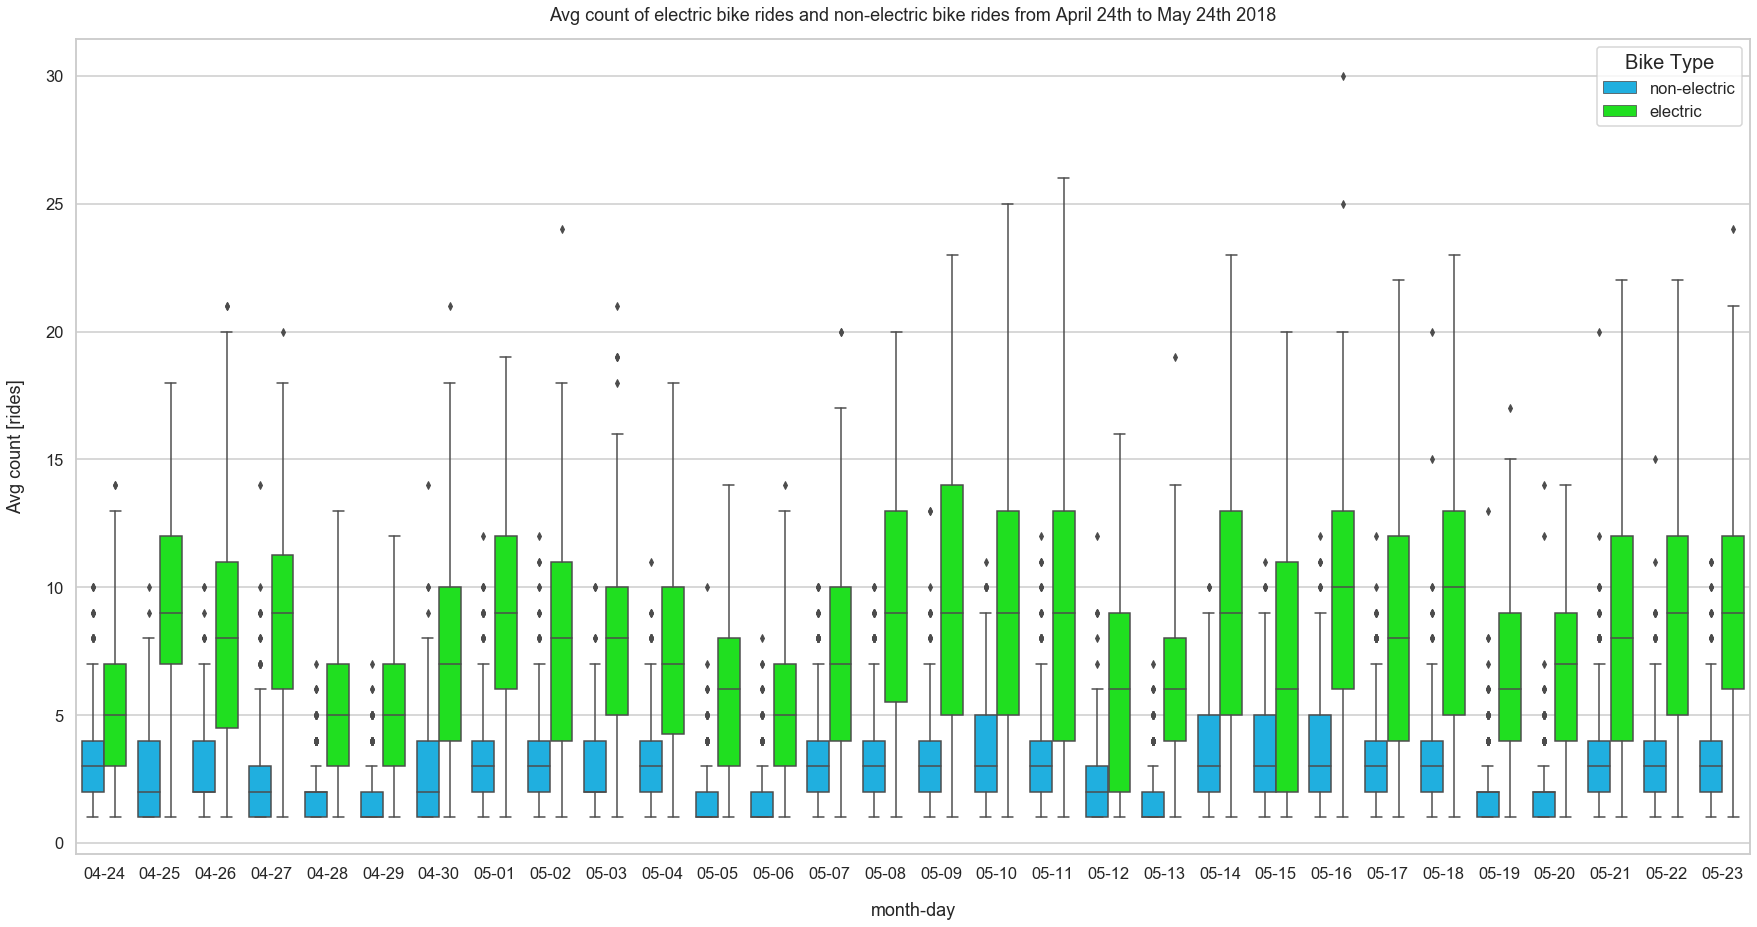

In [193]:
plt.figure(figsize=(30,15))
my_palette = {"electric":"lime", 'non-electric':'deepskyblue'}
ax = sns.boxplot(x='start_time_date', y='count', hue='bike_type', linewidth=1.5, palette=my_palette, data=electric_bike_verification_df)
plt.title('Avg count of electric bike rides and non-electric bike rides from April 24th to May 24th 2018', y=1.015)
plt.xlabel('month-day', labelpad=20)
plt.ylabel('Avg count [rides]', labelpad=20)
leg = ax.legend()
leg.set_title('Bike Type',prop={'size':20})
plt.savefig('image16.png');

The chart illustrates a significant difference between electric and normal bike rides.

### Count of daily electric bike rides from April 24th 2018 to November 30th 2018

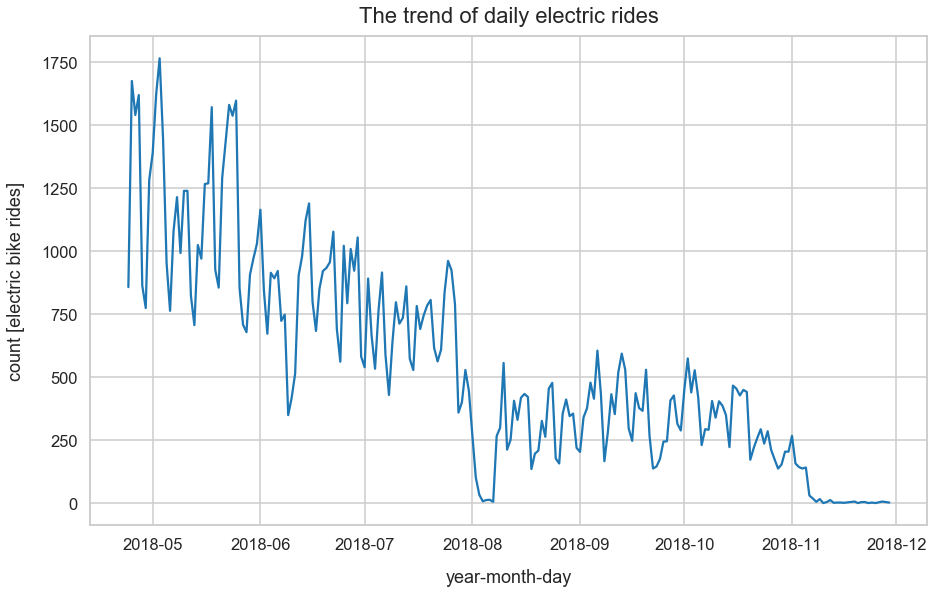

In [268]:
electric_df = df[df['electric_bike_id']==1].reset_index()
electric_df.groupby('start_time_date').agg({'bike_id':'count'}).plot(style='-', legend=False, figsize=(15,9))
plt.title('The trend of daily electric rides', fontsize=22, y=1.015)
plt.xlabel('year-month-day', labelpad=16)
plt.ylabel('count [electric bike rides]', labelpad=16)
plt.savefig('image16.png');

A significant spike is shown toward the end of April. Research showed that around April 24th there was an event to celebrate the launch of e-bike, https://www.lyft.com/bikes/bay-wheels. Following the usage trend for electric bikes decreases. On average, daily electric bike rides around July 2018 is about 500+, which is 10% of daily bike rides (5000+) on July 2018.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Data indicates percentage of subscribers is 88.08%. Data indicates percentage of customers is 11.91%. The graph illustrates subscribers rides as most significant decreasing toward the winter session than customers (Nov. 2018). Subscribers' average trip duration around 11 minutes. Conversely, customers' average trip duration of 28 minutes. 80% of the rides are from subscribers and it illustrating use of service during commute hours. Subscribers and customers trip distance were comparable, which is moderately more than one mile. Subscribers' most frequently used timing is around 7 ~ 9am and 4 ~ 6pm, which is a commute time. In the contrary, Customers' most frequently used timing are weekend 12pm ~ 4pm and weekday 5pm ~ 6pm. Customers tend to use this service during weekend for leisure and after work.A significant spike is shown toward the end of April. Research showed that around April 24th there was an event to celebrate the launch of e-bike, https://www.lyft.com/bikes/bay-wheels. Following the usage trend for electric bikes decreases. On average, daily electric bike rides around July 2018 is about 500+, which is 10% of daily bike rides (5000+) on July 2018.

### Were there any interesting or surprising interactions between features?

Observation indicates toward the beginning of electrical bike hiring program launch there was a high demand with the program. After a time, it decreased suddenly.

## Multivariate Exploration

Exploration in this section of the analysis will comprise of the three variables age group, weekdays, timeframe of subscribers in relationship with hiring. As subscribers are more common and hiring partners of this program.

In [269]:
subscriber_hour_df2 = df[(df['member_age']>=20) & (df['member_age']<30) 
                              &(df['start_time_hour']>5)&(df['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [270]:
subscriber_hour_df3 = df[(df['member_age']>=30) & (df['member_age']<40) 
                              &(df['start_time_hour']>5)&(df['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [271]:
subscriber_hour_df4 = df[(df['member_age']>=40) & (df['member_age']<50) 
                              &(df['start_time_hour']>5)&(df['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [272]:
subscriber_hour_df2['start_time_weekday_abbr'] = pd.Categorical(subscriber_hour_df2['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [273]:
subscriber_hour_df3['start_time_weekday_abbr'] = pd.Categorical(subscriber_hour_df3['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [274]:

subscriber_hour_df4['start_time_weekday_abbr'] = pd.Categorical(subscriber_hour_df4['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [275]:
subscriber_hour_df2['count_perc'] = subscriber_hour_df2['count'].apply(lambda x: (x/subscriber_hour_df['count'].sum())*100)

In [276]:
subscriber_hour_df3['count_perc'] = subscriber_hour_df3['count'].apply(lambda x: (x/subscriber_hour_df['count'].sum())*100)

In [277]:
subscriber_hour_df4['count_perc'] = subscriber_hour_df4['count'].apply(lambda x: (x/subscriber_hour_df['count'].sum())*100)

In [278]:
subscriber_hour_df2['rank'] = subscriber_hour_df2['count_perc'].rank(ascending=False).astype(int)

In [279]:
subscriber_hour_df3['rank'] = subscriber_hour_df3['count_perc'].rank(ascending=False).astype(int)


In [280]:
subscriber_hour_df4['rank'] = subscriber_hour_df4['count_perc'].rank(ascending=False).astype(int)


In [281]:
subscriber_hour_df_pivoted2 = subscriber_hour_df2.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')

In [282]:
subscriber_hour_df_pivoted3 = subscriber_hour_df3.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')

In [283]:
subscriber_hour_df_pivoted4 = subscriber_hour_df4.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')

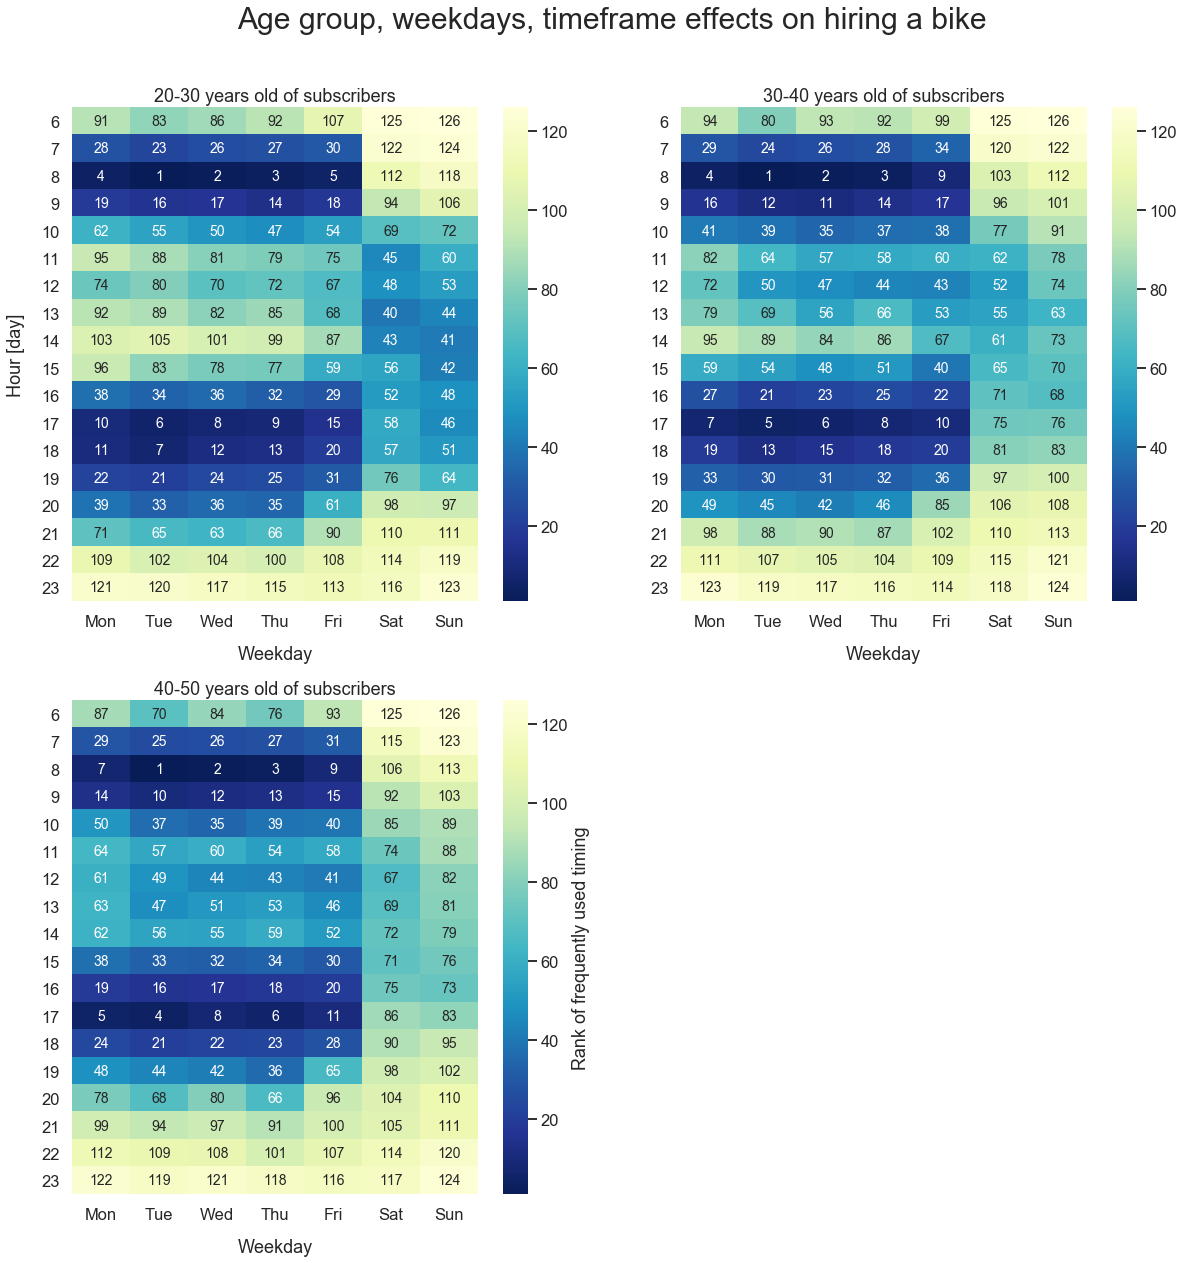

In [284]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.suptitle('Age group, weekdays, timeframe effects on hiring a bike', fontsize=30, y=0.95)
sns.heatmap(subscriber_hour_df_pivoted2, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 14})
plt.title("20-30 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hour [day]', labelpad=16)
plt.yticks(rotation=360)
plt.subplot(222)
sns.heatmap(subscriber_hour_df_pivoted3, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 14})
plt.title("30-40 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)
plt.subplot(223)
sns.heatmap(subscriber_hour_df_pivoted4, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 14}, cbar_kws={'label': 'Rank of frequently used timing'})
plt.title("40-50 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)
plt.savefig('image18.png');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

We extended our investigation of bike hiring with 3 different variables age group, timeframe, weekday. The multivariate exploration demonstrates that users who are older than the others have more time to drive a bike rather than a young people. 20-30 years old users are active during is commute hours. They drive a bike when leaving to their offices or returning to their homes. These figures shows us when at an elderly age, users ride consistently ride these bikes throughout the day. It may be related with their retirement or older users have much more flexiable working hours rather than youngers.

### Were there any interesting or surprising interactions between features?

An interesting aspect was the significant ranking of the 40 to 50 years old user group. The resulting figures for 40-50 years show that they are active and more flexiable rather than the younger users.

### Conclusion 

There were 3.27 billion rides and 20 to 40 years old people took the more than 70% of bike rides. Among those, 30 to 40 years old people's rides account almost 40% of all bike rides. Males demonstrate 76% of all bike rides, in turn females are viewes with taken 22% of them. The data illustrates users use the service on weekdays moreso than on weekends. Data shows 8am and 5pm as the peak hours for this service. Illustrating the majority of users utilize during the commuting hours, in addition, during lunch hours. As well, subscribers rides as most significant decreasing toward the winter session than customers. Subscribers' average trip duration around 11 minutes. Conversely, customers' average trip duration of 28 minutes. 80% of the rides are from subscribers and it illustrating use of service during commute hours. Subscribers and customers trip distance were comparable, which is moderately more than one mile. Subscribers' most frequently used timing is around 7 ~ 9am and 4 ~ 6pm, which is a commute time. In the contrary, Customers' most frequently used timing are weekend 12pm ~ 4pm and weekday 5pm ~ 6pm. Customers tend to use this service during weekend for leisure and after work. 40 to 50 year old users tend to use the service signifantly above other users.